In [1]:
import pandas as pd
df = pd.read_csv('Data/ENB2012_data.csv')
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [3]:
cols = df.columns[:8]
cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

In [4]:
x = df[cols]
y = df['Y1']  # 난방 하중

In [6]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, random_state=10)

<Axes: >

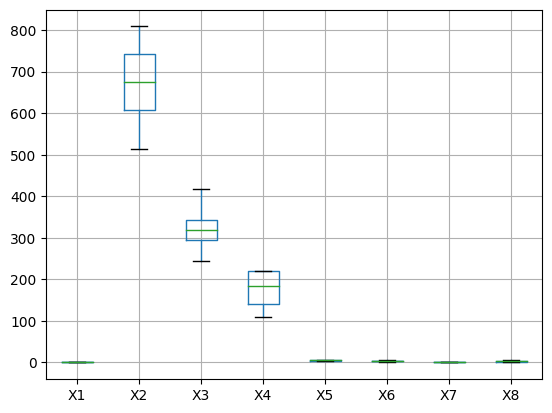

In [7]:
x.boxplot()

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
# standardization 표준화
# k-means, svm 등 거리 기반의 모델에서 주로 사용함

# 학습용 데이터셋의 변수들의 평균, 표준편차값 계산
mean_on_train = x_tr.mean(axis=0)
std_on_train = x_tr.std(axis=0)

# standardization
x_train_scaled = (x_tr - mean_on_train) / std_on_train
x_test_scaled = (x_ts - mean_on_train) / std_on_train
print(x_train_scaled.describe())
print(x_test_scaled.describe())

                 X1            X2          X3            X4            X5  \
count  5.760000e+02  5.760000e+02  576.000000  5.760000e+02  5.760000e+02   
mean   1.249001e-16  4.086238e-16    0.000000 -2.436323e-16 -8.326673e-17   
std    1.000000e+00  1.000000e+00    1.000000  1.000000e+00  1.000000e+00   
min   -1.394511e+00 -1.817346e+00   -1.668676 -1.467738e+00 -1.023718e+00   
25%   -7.170811e-01 -6.807649e-01   -0.567694 -6.469449e-01 -1.023718e+00   
50%   -3.965116e-02 -1.124742e-01   -0.017203 -6.469449e-01  9.751352e-01   
75%    5.410031e-01  7.399619e-01    0.533288  9.946422e-01  9.751352e-01   
max    2.089414e+00  1.592398e+00    2.184761  9.946422e-01  9.751352e-01   

               X6            X7            X8  
count  576.000000  5.760000e+02  5.760000e+02  
mean     0.000000  2.929755e-17 -1.233581e-17  
std      1.000000  1.000000e+00  1.000000e+00  
min     -1.344215 -1.760325e+00 -1.811136e+00  
25%     -0.448072 -1.012852e+00 -1.163579e+00  
50%     -0.448072 

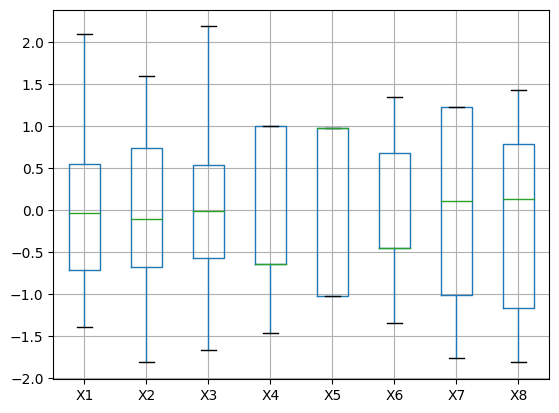

In [12]:
import matplotlib.pyplot as plt  
x_train_scaled.boxplot()  
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train_scaled,y_tr)
model.predict(x_test_scaled)[:10]

array([17.145, 15.78 , 11.96 , 29.045, 18.32 ,  8.2  , 13.395, 36.385,
       32.76 , 16.89 ])

In [15]:
y_ts.values[:10]

array([19.52, 16.76, 12.32, 28.05, 19.  ,  6.04, 11.34, 35.56, 32.84,
       16.62])

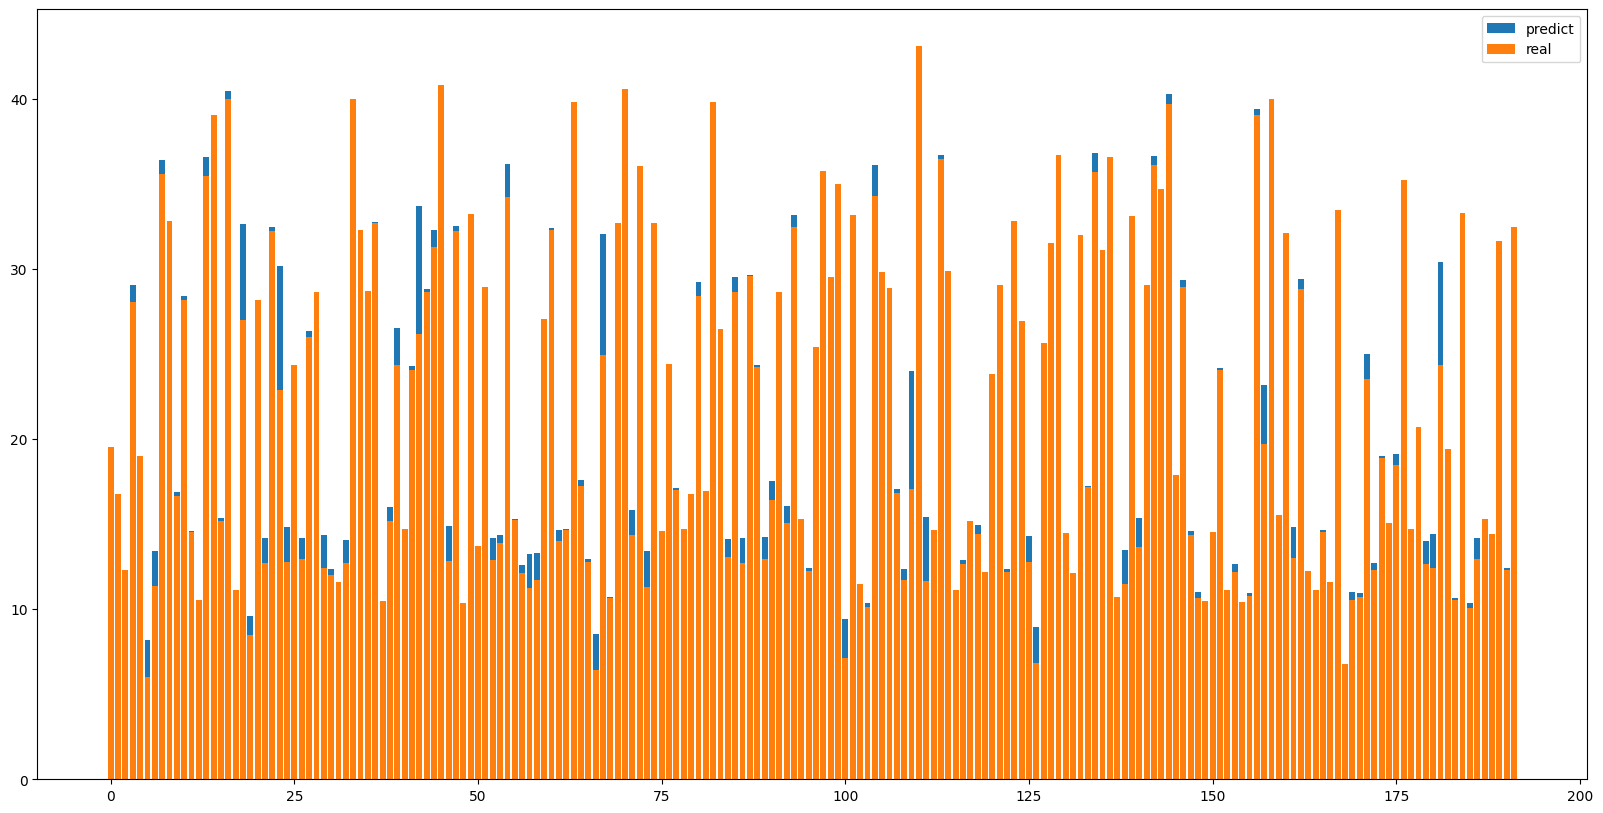

In [16]:
plt.figure(figsize=(20,10))  
plt.bar(range(len(y_ts)), model.predict(x_test_scaled), label='predict')  
plt.bar(range(len(y_ts)), y_ts.values, label='real')  
plt.legend()  
plt.show()

In [17]:
# score() 함수의 결과값 - R Squared

model.score(x_test_scaled,y_ts)    

0.9601788721557631